In [1]:
'''
Adapted from https://github.com/lukepolson/youtube_channel/vid3.ipynb
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal


Solving a linear system of massses connected by springs. 
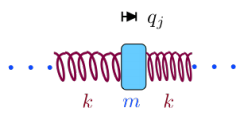
Energy is given by 
$$T=\tfrac{1}{2}\sum_{j=1}^N m_j^{-1}p_j^2\qquad V=\tfrac{1}{2}\sum_{j=0}^N k_j(q_{j+1}-q_j) $$
and so the hamiltonian $(H=T+V)$ is 
$$H=\tfrac{1}{2}\sum_{j=1}^N \left[m_j^{-1}p_j^2+k_j(q_{j+1}-q_j)\right] $$
Hamilton's equations can be used to get $\dot{p}$ and $\dot{q}$. Then eliminate momenta to get $\ddot{q}=-\mathbf{A}q$ where $A$ is the tridiagonal matrix. Using $\omega=\sqrt{k/m}$
$$ A=\omega^2\begin{bmatrix}
2 & -1 & 0 & 0 & \dots & \dots & \dots & 0\\
-1 & 2 & -1 & 0 & \dots & \dots & \dots & 0\\
0 & -1 & 2 & -1 & \dots & \dots & \dots & 0\\
0 & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & 0\\
0 & 0 & 0 & \dots & -1 & 2 & -1 & 0\\
0 & 0 & 0 & \dots & \dots & -1 & 2 & -1\\
0 & 0 & 0 & \dots & \dots & 0 & -1 & 2\\
\end{bmatrix} $$

Define what $N$ is

In [2]:
#Number of oscillators
N = 50
#Use the variable y=x/L, where L is the length of the full array
y = np.linspace(0, 1, N) #Points along the array, 0=start, 1=end.

In [3]:
#Diagonal, d, and off diagonal, e, elements of tridiagonal matrix
d = 2 * np.ones(N)
e = -1 * np.ones(N-1)

In [4]:
w, v = eigh_tridiagonal(d, e) #Defines tridiagonal matrix
#Gets eigenvalues w, and eigenvectors v.

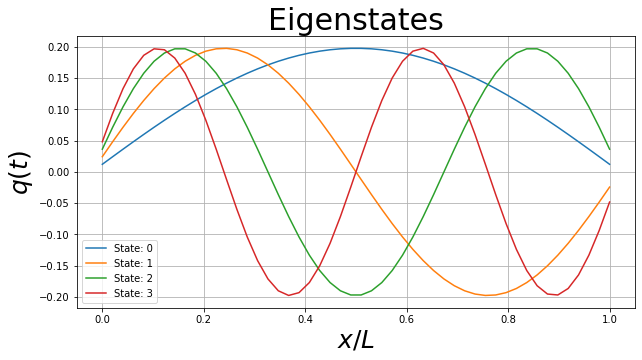

In [5]:
#Plots eigenstates in a given range. By default 4
plt.figure(figsize=(10,5))
for i in range(4):
    plt.plot(y, v.T[i], label = "State: "+str(i))
plt.title('Eigenstates', fontsize=30)
plt.ylabel('$q(t)$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.legend()
plt.grid()
plt.savefig('v3p2.png', dpi=200)

Text(0.5, 1.0, 'Energies with increasing eigenvalue')

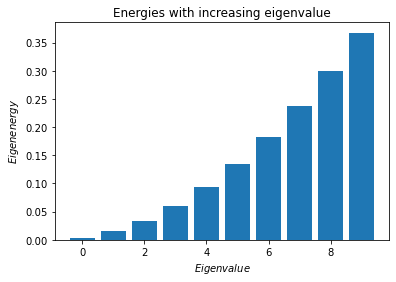

In [6]:
plt.bar(np.arange(0, 10, 1), w[0:10])
plt.ylabel('$Eigenenergy$')
plt.xlabel('$Eigenvalue$')
plt.title('Energies with increasing eigenvalue')